In [7]:
# ETL Project
# Taylor Sperry, Abdellah Hady, Will Jung, Andrew Miller, Emmanuel Obodoechine

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


In [38]:
# Save CSV file names
file_one = "Resources/HappinessAlcoholConsumption.csv"
file_two = "Resources/gapminder_alcohol.csv"
file_three = "Resources/Life Expectancy Data.csv"

# Import CSV files
df_happy = pd.read_csv(file_one, encoding="ISO-8859-1")
df_unhappy = pd.read_csv(file_two, encoding="ISO-8859-1")
df_life = pd.read_csv(file_three, encoding="ISO-8859-1")

In [39]:
# View Alcohol Happiness File
df_happy.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [40]:
# Drop null values
df_happy.dropna()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


In [41]:
df_happy = df_happy.drop(columns=['Hemisphere', 'Region'])

In [42]:
alc_happy = df_happy.rename(columns={"Country":"country", "HappinessScore":"happiness_score", "HDI":"hdi",
                                    "GDP_PerCapita":"gdp_percapita", "Beer_PerCapita":"beer",
                                    "Spirit_PerCapita":"spirits", "Wine_PerCapita":"wine"})
alc_happy

,country,happiness_score,hdi,gdp_percapita,beer,spirits,wine
0,Denmark,7.526,928,53.579,224,81,278
1,Switzerland,7.509,943,79.866,185,100,280
2,Iceland,7.501,933,60.530,233,61,78
3,Norway,7.498,951,70.890,169,71,129
4,Finland,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...
117,Tanzania,3.666,533,878.000,36,6,1
118,Liberia,3.622,432,455.000,19,152,2
119,Benin,3.484,512,789.000,34,4,13
120,Togo,3.303,500,577.000,36,2,19


In [43]:
# Checking for file types and number of data points
alc_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          122 non-null    object 
 1   happiness_score  122 non-null    float64
 2   hdi              122 non-null    int64  
 3   gdp_percapita    122 non-null    float64
 4   beer             122 non-null    int64  
 5   spirits          122 non-null    int64  
 6   wine             122 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 6.8+ KB


In [44]:
df_unhappy = df_unhappy.dropna()
df_unhappy

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70
6,Argentina,9.35,10749.419240,7.765584,58.400002,92.00
7,Armenia,13.66,1326.741757,3.741588,40.099998,63.86
...,...,...,...,...,...,...
207,Venezuela,7.60,5528.363114,4.119620,59.900002,93.32
208,Vietnam,3.91,722.807559,11.653322,71.000000,27.84
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000,30.64
211,Zambia,3.56,432.226337,12.019036,61.000000,35.42


In [45]:
alc_unhappy = df_unhappy.drop(columns="urbanrate").rename(columns={"alcconsumption":"consumption", "suicideper100th":"suiciderate"})
alc_unhappy

,country,consumption,incomeperperson,suiciderate,employrate
1,Albania,7.29,1914.996551,7.699330,51.400002
2,Algeria,0.69,2231.993335,4.848770,50.500000
4,Angola,5.57,1381.004268,14.554677,75.699997
6,Argentina,9.35,10749.419240,7.765584,58.400002
7,Armenia,13.66,1326.741757,3.741588,40.099998
...,...,...,...,...,...
207,Venezuela,7.60,5528.363114,4.119620,59.900002
208,Vietnam,3.91,722.807559,11.653322,71.000000
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000
211,Zambia,3.56,432.226337,12.019036,61.000000


In [46]:
alc_unhappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 1 to 212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          162 non-null    object 
 1   consumption      162 non-null    float64
 2   incomeperperson  162 non-null    float64
 3   suiciderate      162 non-null    float64
 4   employrate       162 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB


In [47]:
df_life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [48]:
life_columns = ['Country', 'Year', 'Life expectancy ']
life_df = df_life[life_columns].copy()
life_df

,Country,Year,Life expectancy
0,Afghanistan,2015,65.0
1,Afghanistan,2014,59.9
2,Afghanistan,2013,59.9
3,Afghanistan,2012,59.5
4,Afghanistan,2011,59.2
...,...,...,...
2933,Zimbabwe,2004,44.3
2934,Zimbabwe,2003,44.5
2935,Zimbabwe,2002,44.8
2936,Zimbabwe,2001,45.3


In [49]:
clean_life = life_df.loc[life_df["Year"] == 2015].drop(columns="Year")
clean_life

,Country,Life expectancy
0,Afghanistan,65.0
16,Albania,77.8
32,Algeria,75.6
48,Angola,52.4
64,Antigua and Barbuda,76.4
...,...,...
2858,Venezuela (Bolivarian Republic of),74.1
2874,Viet Nam,76.0
2890,Yemen,65.7
2906,Zambia,61.8


In [50]:
life_df = clean_life.rename(columns={'Country':'country', 'Life expectancy ':'life_exp'})
life_df

,country,life_exp
0,Afghanistan,65.0
16,Albania,77.8
32,Algeria,75.6
48,Angola,52.4
64,Antigua and Barbuda,76.4
...,...,...
2858,Venezuela (Bolivarian Republic of),74.1
2874,Viet Nam,76.0
2890,Yemen,65.7
2906,Zambia,61.8


In [51]:
alcohol_df = pd.merge(alc_happy, alc_unhappy, on="country", how="left")
alcohol_df

,country,happiness_score,hdi,gdp_percapita,beer,spirits,wine,consumption,incomeperperson,suiciderate,employrate
0,Denmark,7.526,928,53.579,224,81,278,12.02,30532.277040,8.973104,63.099998
1,Switzerland,7.509,943,79.866,185,100,280,11.41,37662.751250,13.239810,64.300003
2,Iceland,7.501,933,60.530,233,61,78,7.38,33945.314420,11.426181,73.599998
3,Norway,7.498,951,70.890,169,71,129,8.35,39972.352770,10.823000,65.000000
4,Finland,7.413,918,43.433,263,133,97,13.10,27110.731590,16.234370,57.200001
...,...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,3.666,533,878.000,36,6,1,7.86,456.385712,12.411181,78.199997
118,Liberia,3.622,432,455.000,19,152,2,5.07,155.033231,7.184853,66.000000
119,Benin,3.484,512,789.000,34,4,13,2.08,377.039699,6.057740,71.599998
120,Togo,3.303,500,577.000,36,2,19,1.92,285.224449,6.369888,63.900002


In [73]:
alcohol_happiness_score  = alcohol_df.drop(columns=['country', 'suiciderate','hdi','gdp_percapita','beer','spirits','wine','incomeperperson','employrate'])
alcohol_happiness_score

,happiness_score,consumption
0,7.526,12.02
1,7.509,11.41
2,7.501,7.38
3,7.498,8.35
4,7.413,13.10
...,...,...
117,3.666,7.86
118,3.622,5.07
119,3.484,2.08
120,3.303,1.92


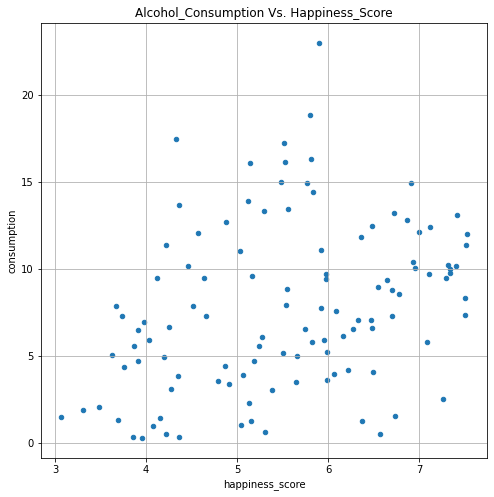

In [92]:
alcohol_happiness_score.plot(kind="scatter", x="happiness_score", y="consumption", grid=True, figsize=(8,8),
              title="Alcohol_Consumption Vs. Happiness_Score")
plt.show()

In [84]:
alcohol_suiciderate  = alcohol_df.drop(columns=['country', 'happiness_score','hdi','gdp_percapita','beer','spirits','wine','incomeperperson','employrate'])
alcohol_suiciderate

,consumption,suiciderate
0,12.02,8.973104
1,11.41,13.239810
2,7.38,11.426181
3,8.35,10.823000
4,13.10,16.234370
...,...,...
117,7.86,12.411181
118,5.07,7.184853
119,2.08,6.057740
120,1.92,6.369888


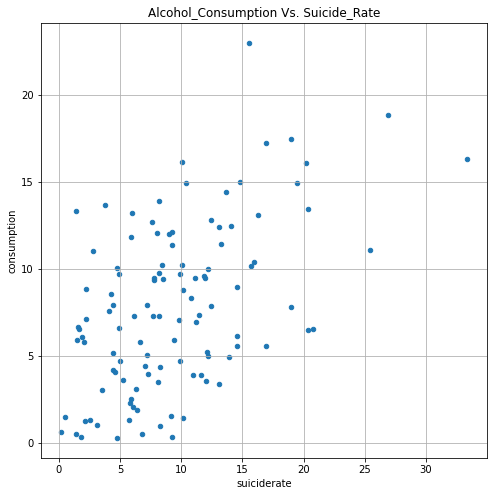

In [93]:
alcohol_suiciderate.plot(kind="scatter", x="suiciderate", y="consumption", grid=True, figsize=(8,8),
              title="Alcohol_Consumption Vs. Suicide_Rate")
plt.show()

In [52]:
alcohol_life_df = pd.merge(alcohol_df, life_df, on="country", how="left")
alcohol_life_df

,country,happiness_score,hdi,gdp_percapita,beer,spirits,wine,consumption,incomeperperson,suiciderate,employrate,life_exp
0,Denmark,7.526,928,53.579,224,81,278,12.02,30532.277040,8.973104,63.099998,86.0
1,Switzerland,7.509,943,79.866,185,100,280,11.41,37662.751250,13.239810,64.300003,83.4
2,Iceland,7.501,933,60.530,233,61,78,7.38,33945.314420,11.426181,73.599998,82.7
3,Norway,7.498,951,70.890,169,71,129,8.35,39972.352770,10.823000,65.000000,81.8
4,Finland,7.413,918,43.433,263,133,97,13.10,27110.731590,16.234370,57.200001,81.1
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,3.666,533,878.000,36,6,1,7.86,456.385712,12.411181,78.199997,NaN
118,Liberia,3.622,432,455.000,19,152,2,5.07,155.033231,7.184853,66.000000,61.4
119,Benin,3.484,512,789.000,34,4,13,2.08,377.039699,6.057740,71.599998,60.0
120,Togo,3.303,500,577.000,36,2,19,1.92,285.224449,6.369888,63.900002,59.9


In [53]:
#Connect to local database
connection_string = "postgres:postgres@localhost:5432/alcohol_life_db"
engine = create_engine(f'postgresql://{connection_string}')

In [54]:
engine.table_names()


[]

In [55]:
alcohol_life_df

,country,happiness_score,hdi,gdp_percapita,beer,spirits,wine,consumption,incomeperperson,suiciderate,employrate,life_exp
0,Denmark,7.526,928,53.579,224,81,278,12.02,30532.277040,8.973104,63.099998,86.0
1,Switzerland,7.509,943,79.866,185,100,280,11.41,37662.751250,13.239810,64.300003,83.4
2,Iceland,7.501,933,60.530,233,61,78,7.38,33945.314420,11.426181,73.599998,82.7
3,Norway,7.498,951,70.890,169,71,129,8.35,39972.352770,10.823000,65.000000,81.8
4,Finland,7.413,918,43.433,263,133,97,13.10,27110.731590,16.234370,57.200001,81.1
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,3.666,533,878.000,36,6,1,7.86,456.385712,12.411181,78.199997,NaN
118,Liberia,3.622,432,455.000,19,152,2,5.07,155.033231,7.184853,66.000000,61.4
119,Benin,3.484,512,789.000,34,4,13,2.08,377.039699,6.057740,71.599998,60.0
120,Togo,3.303,500,577.000,36,2,19,1.92,285.224449,6.369888,63.900002,59.9


In [56]:
##alcohol_life_df.to_csv(r'Resources\alcohol_life_df.csv', index = False)

new_alcohol_data_df.to_sql(name='customer_name', con=engine, if_exists='append', index=False)

In [ ]:
# Create a bar chart based off of the group series from before
suiciderate_chart =alcohol_life_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("consumption")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()